<a href="https://colab.research.google.com/github/Tanjul5/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YES BANK STOCK CLOSING PRICE PREDICTION

**PROBLEM STATEMENT**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read csv file
bank_df= pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [4]:
#check data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [5]:
bank_df.shape

(185, 5)

In [6]:
bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

only date column is an object type

no null values

dataset has 5 column and 185 rows

Close column is dependent varibale

In [7]:
#extract statistical information
bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


here is an outlier because of maximum value is much more high with respect to mean values.

**EDA AND DATAPREPROCESSING**

In [8]:
#check duplicate values
bank_df.duplicated().sum()

0

In [9]:
bank_df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

dates are from july 2005 to november 2020

In [10]:
#preserve original file
df=bank_df.copy()

In [11]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df['Date'] = pd.to_datetime(bank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [12]:
#check date column
df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

Now dates are in integer data types

**Check year distribution with respect to 'Close' variable**

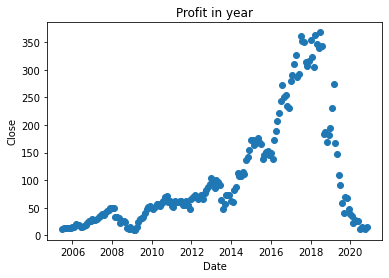

In [13]:
plt.scatter(df['Date'], df['Close'])
plt.title('Profit in year')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

As seen in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor.

**Create dependent and independent variable**

In [14]:
#create dependent and independent variable

#dependent variable 'close'
depen_var='Close'

#independent variable
indep_var='Open','High','Low'


** DATA VISULIZATION**

**UNIVARIATE ANALYSIS**

**Plote a graph of independent variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


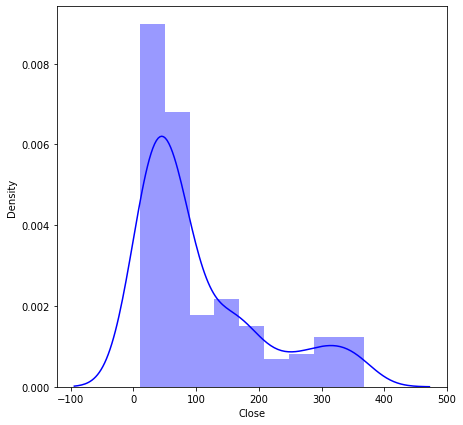

In [15]:
#dependent variable close
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="b")

***closing price graph is not showing normal distribution, it is right skewed means positive skewed so we apply log transformation.***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


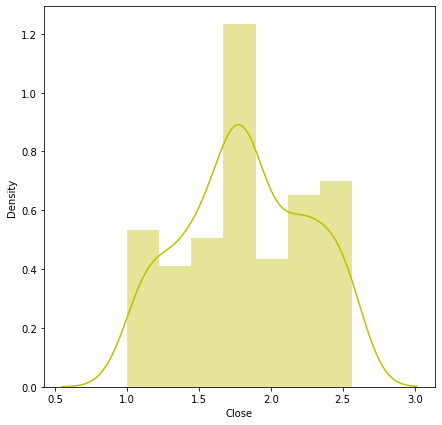

In [16]:
# Dependent variable 'Close'log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

***Now it is normal ditributed***

**Now plote a graph of independent variable with or without log transformation**

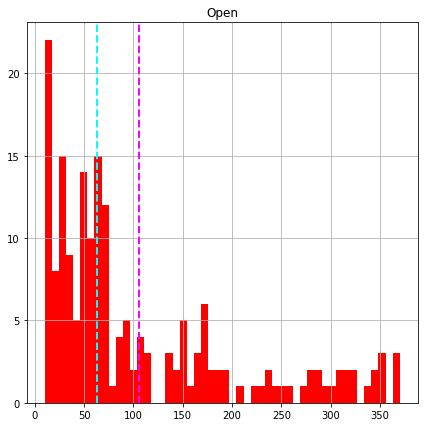

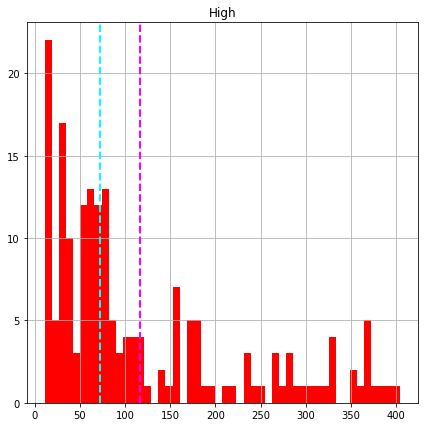

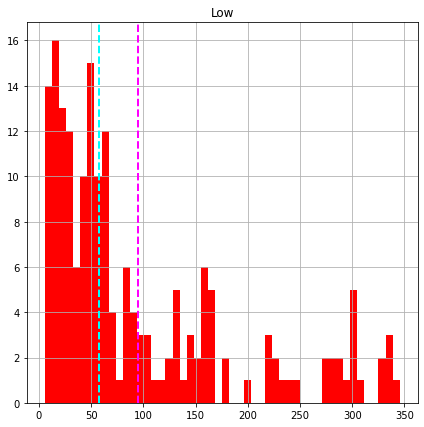

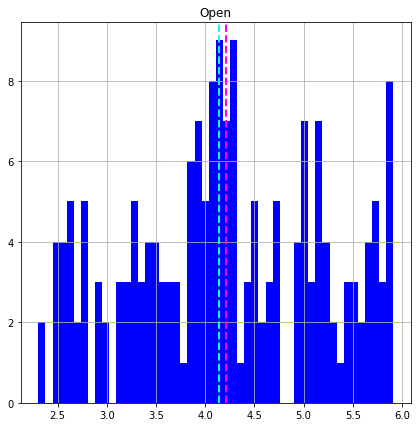

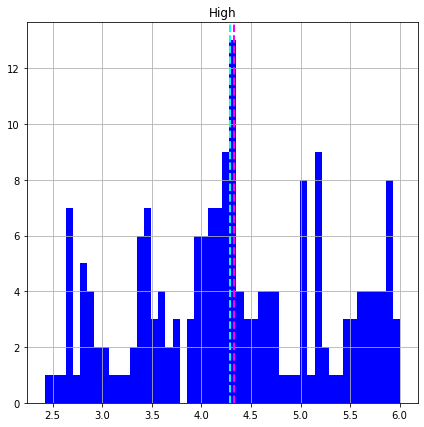

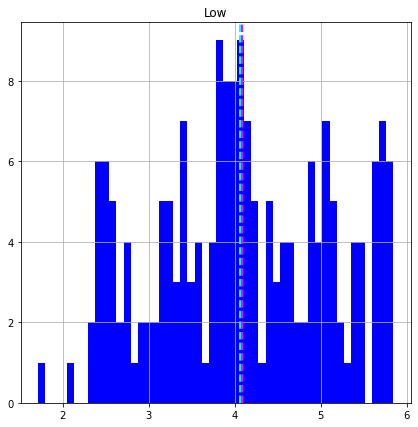

In [17]:
for col in indep_var:
  fig=plt.figure(figsize=(7,7))
  ax = fig.gca()
  features = df[col]
  label =df['Close']
  features.hist(bins = 50,ax = ax,color = 'red')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(col)

  #log transformation

for col in indep_var:
  fig=plt.figure(figsize=(7,7))
  ax = fig.gca()
  features = np.log(df[col])
  label = df['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(col)

***You can see three of them variable are positively skewed so we have done log transformer for normal distribution.***

Now lets check by the pairplote what are relation they have

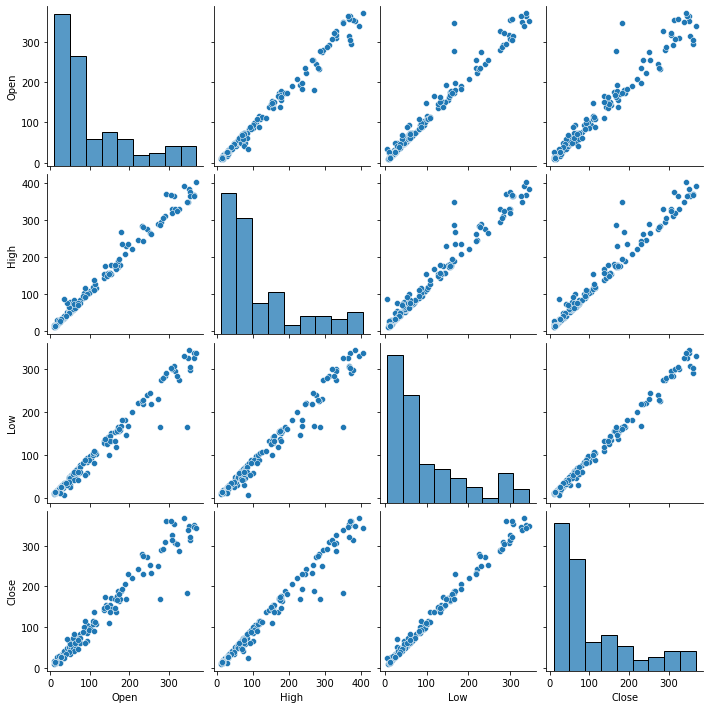

In [18]:
sns.pairplot(df)

all the variable are showing high correlation it showing linear realtionship.

**plot heatmap for correlation cofficient **

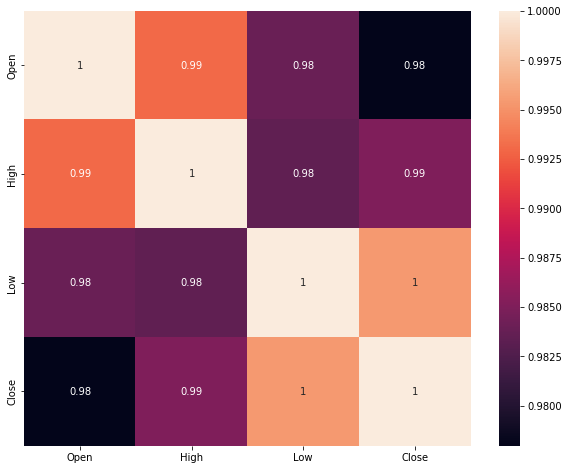

In [19]:
# plotting correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

•	All variables show the highest positive correlation among them which was above 0.98.

•	 ‘Open’ variable was highest correlated with ‘High’ variable which was 0.99/99%.

•	On the other hand, highest correlated coefficient was 1 between ‘Low’ and ‘Close’ variable.


In [24]:
#Assign x and y values 

x=df[['High','Low','Open']]
y=df ['Close']


In [25]:
x

,High,Low,Open
0,14.00,11.25,13.00
1,14.88,12.55,12.58
2,14.87,12.27,13.48
3,14.47,12.40,13.20
4,13.88,12.88,13.35
...,...,...,...
180,28.30,11.10,25.60
181,17.16,11.85,12.00
182,15.34,12.75,14.30
183,14.01,12.11,13.30


In [26]:
y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [28]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 2)

In [30]:
#data transformation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
#reshape dataset


print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (148, 3)
x_test:  (37, 3)
y_train:  (148,)
y_test:  (37,)


# **LINEAR REGRESSION**